In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_theme(style="darkgrid")

In [44]:
df = pd.read_csv("../datasets/Space_Exploration_Cleaned.csv")

# Company with most active rockets (with percent)


In [45]:
df_rocket = df[["Company Name", "Status Rocket"]]

In [46]:
df_rocket_active = df_rocket[df_rocket["Status Rocket"] == "StatusActive"]
df_rocket_active = df_rocket_active.groupby("Company Name").count()
df_active = df_rocket_active.rename(columns={"Status Rocket": "StatusActive"})
df_active.head()

,StatusActive
Company Name,
AEB,3
Arianespace,114
Blue Origin,12
Boeing,1
CASC,211


In [47]:
df_rocket_retired = df_rocket[df_rocket["Status Rocket"] == "StatusRetired"]
df_rocket_retired = df_rocket_retired.groupby("Company Name").count()
df_retired = df_rocket_retired.rename(columns={"Status Rocket": "StatusRetired"})
df_retired.head()

,StatusRetired
Company Name,
AMBA,8
ASI,9
Arianespace,165
Arm??e de l'Air,4
Boeing,135


In [48]:
df_final = pd.merge(df_active, df_retired, on="Company Name", how="outer")
df_final = df_final.fillna(0)
df_final["StatusActive"] = df_final["StatusActive"].astype("int")
df_final["StatusRetired"] = df_final["StatusRetired"].astype("int")
df_final["Total Rocket"] = df_final["StatusActive"] + df_final["StatusRetired"]
df_final["% StatusActive"] = df_final["StatusActive"] / df_final["Total Rocket"]
df_final["% StatusRetired"] = df_final["StatusRetired"] / df_final["Total Rocket"]
df_final.sort_values(by=["% StatusActive"], inplace=True, ascending=False)
df_final.reset_index(inplace=True)
df_final.head()

,Company Name,StatusActive,StatusRetired,Total Rocket,% StatusActive,% StatusRetired
0,AEB,3,0,3,1.0,0.0
1,ExPace,10,0,10,1.0,0.0
2,Virgin Orbit,1,0,1,1.0,0.0
3,Sea Launch,36,0,36,1.0,0.0
4,Sandia,1,0,1,1.0,0.0


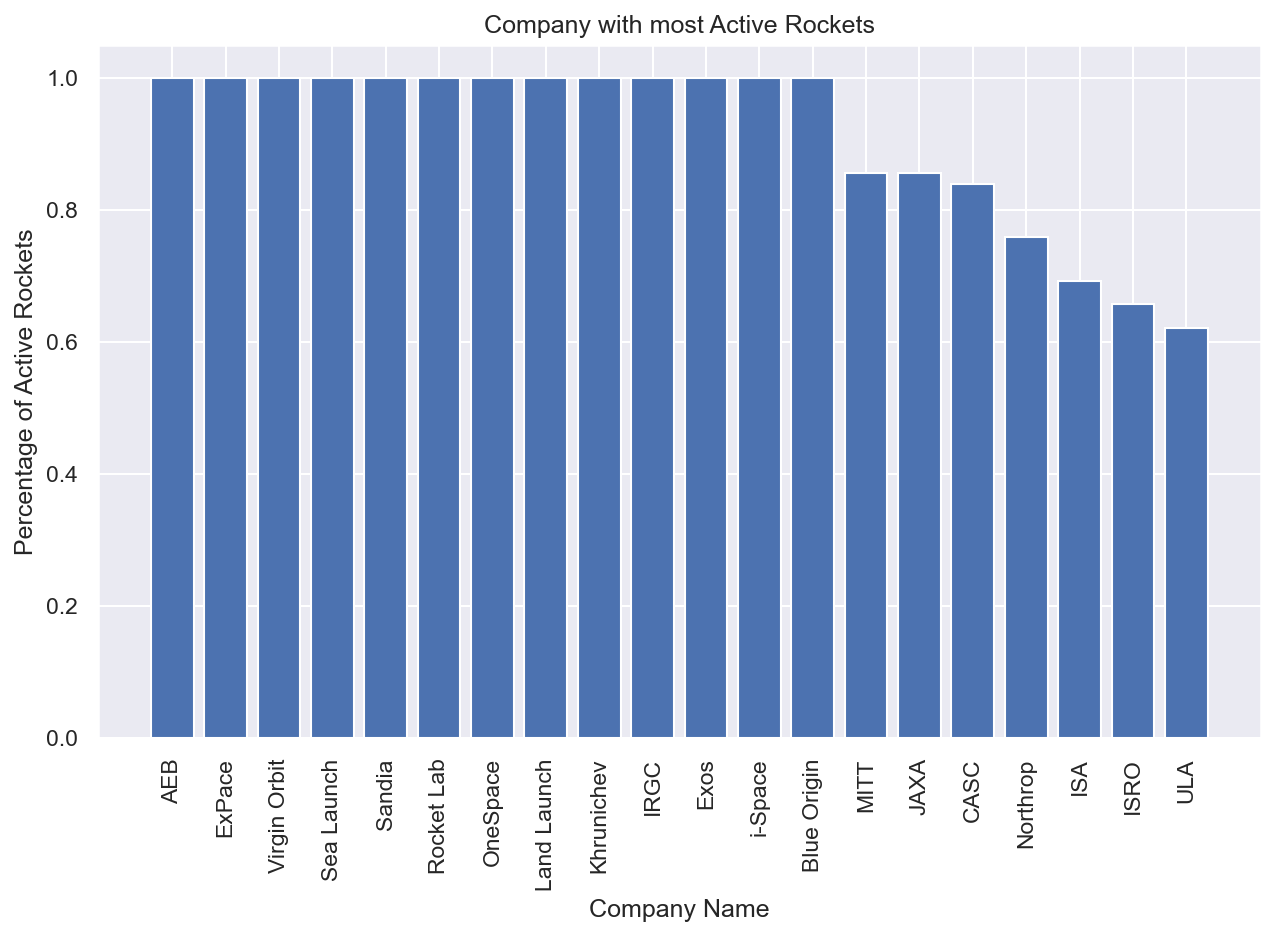

In [49]:
df_final_active_plot = df_final.head(20)

x = df_final_active_plot["Company Name"]
y = df_final_active_plot["% StatusActive"]

figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel("Company Name")
plt.ylabel("Percentage of Active Rockets")
plt.title("Company with most Active Rockets")
plt.xticks(rotation=90)
plt.show()

# Company with most retired rockets (with percent)


In [50]:
df_final.sort_values(by=["% StatusRetired"], inplace=True, ascending=False)
df_final.head()

,Company Name,StatusActive,StatusRetired,Total Rocket,% StatusActive,% StatusRetired
55,Kosmotras,0,22,22,0.0,1.0
42,RAE,0,2,2,0.0,1.0
31,SRC,0,3,3,0.0,1.0
32,Yuzhmash,0,2,2,0.0,1.0
33,Arm??e de l'Air,0,4,4,0.0,1.0


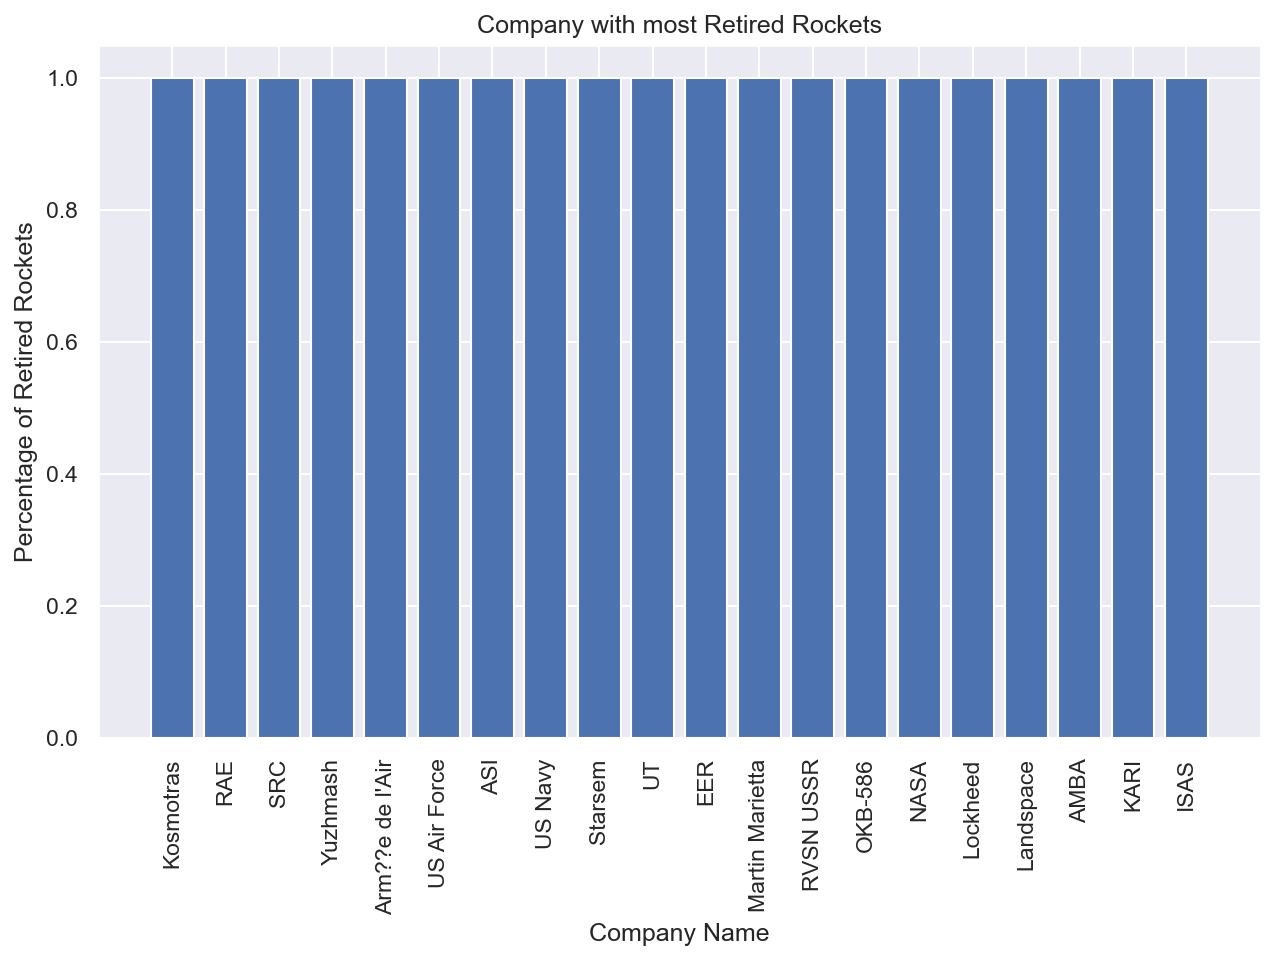

In [51]:
df_final_retired_plot = df_final.head(20)

x = df_final_retired_plot["Company Name"]
y = df_final_retired_plot["% StatusRetired"]

figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel("Company Name")
plt.ylabel("Percentage of Retired Rockets")
plt.title("Company with most Retired Rockets")
plt.xticks(rotation=90)
plt.show()

# Visualisation of Launches by hour of Companies


In [52]:
df_rocket = df[["Company Name", "DateTime"]]
df_rocket.loc[:, "DateTime"] = pd.to_datetime(df_rocket.loc[:, "DateTime"])

# Extract hour and day directly using .apply within .loc
df_rocket.loc[:, "hour"] = df_rocket.loc[:, "DateTime"].apply(
    lambda datetime: datetime.hour
)
df_rocket.loc[:, "day"] = df_rocket.loc[:, "DateTime"].apply(
    lambda datetime: datetime.day
)

# Drop the original DateTime column
df_rocket = df_rocket.drop("DateTime", axis=1)

# View the resulting DataFrame
df_rocket.head()

/var/folders/gh/h3xf46_564xddxy0lr8jzc2m0000gn/T/ipykernel_68242/3772538986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocket.loc[:, "hour"] = df_rocket.loc[:, "DateTime"].apply(
/var/folders/gh/h3xf46_564xddxy0lr8jzc2m0000gn/T/ipykernel_68242/3772538986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocket.loc[:, "day"] = df_rocket.loc[:, "DateTime"].apply(


,Company Name,hour,day
0,SpaceX,5,7
1,CASC,4,6
2,SpaceX,23,4
3,Roscosmos,21,30
4,ULA,11,30


<Figure size 1500x900 with 0 Axes>

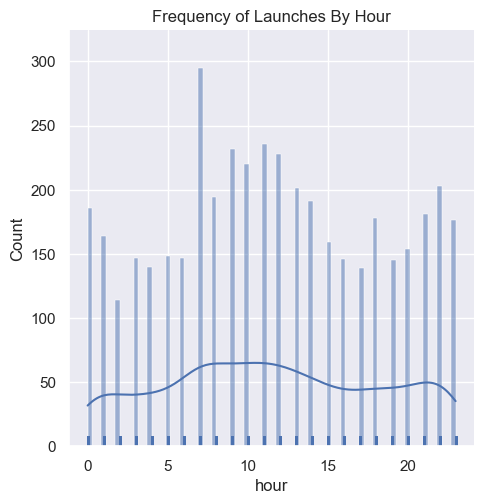

In [53]:
plt.figure(figsize=(10, 6), dpi=150)
sns.displot(df_rocket["hour"], kde=True, rug=True, bins=80)
plt.title("Frequency of Launches By Hour")
plt.show()

# Visualisation of Launches by Day of Companies


<Figure size 1500x900 with 0 Axes>

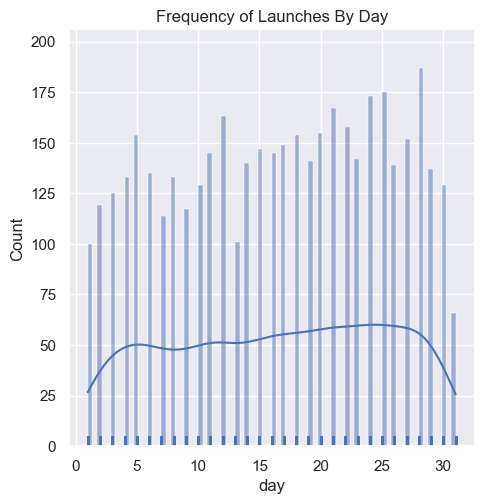

In [54]:
plt.figure(figsize=(10, 6), dpi=150)
sns.displot(df_rocket["day"], kde=True, rug=True, bins=80)
plt.title("Frequency of Launches By Day")
plt.show()

# Visualisation of Year-wise failed missions of Companies


In [55]:
df_rocket = df[["Year", "Status Mission"]]
df_rocket_failure = df_rocket[df_rocket["Status Mission"] == "Failure"]
df_rocket_failure = df_rocket_failure.groupby("Year").count()

df_rocket_failure = df_rocket_failure.rename(
    columns={"Status Mission": "Failed Missions"}
)
df_rocket_failure.reset_index(inplace=True)
df_rocket_failure.head()

,Year,Failed Missions
0,1957,1
1,1958,20
2,1959,9
3,1960,20
4,1961,17


Text(0.5, 1.0, 'Visualization of Failed Missions Per Year')

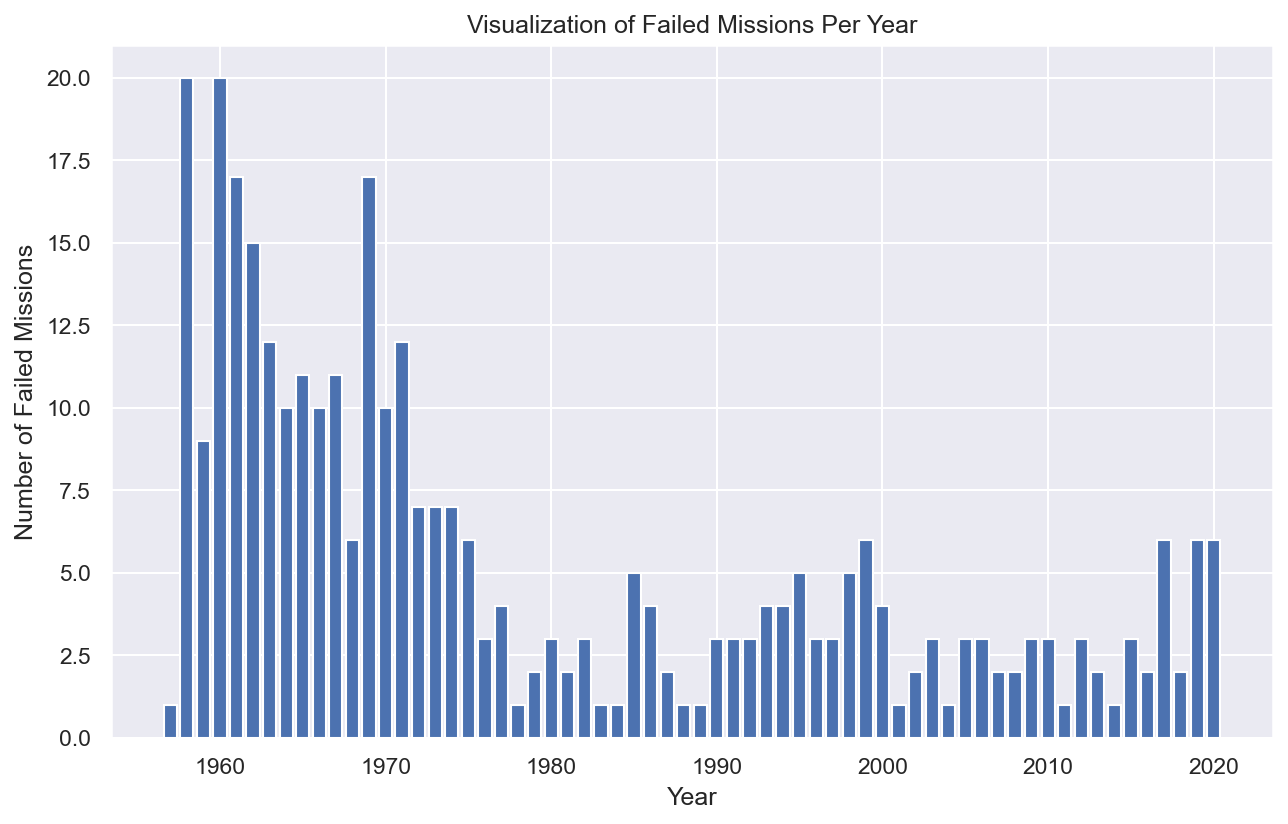

In [56]:
figure(figsize=(10, 6), dpi=150)
plt.bar(df_rocket_failure["Year"], df_rocket_failure["Failed Missions"])
plt.xlabel("Year")
plt.ylabel("Number of Failed Missions")
plt.title("Visualization of Failed Missions Per Year")